## Logistic Regression

This note will cover the following topics:

- Logistic Regression Model
- Binary Cross-Entropy Loss
- Cost Function v.s. Lost Function
- Train the model using gradient descent
> a detailed math derivation of back propagation
- Relationship with neural network model
- Implementation using Scikit-Learn in Python
> iris dataset classification problem
---
**Logistic Regression** is used for solving Binary Classification problem. To be more specific, it solves problems in the form:

Given a dataset with $m$ training samples: $\{(x^{1}, y^{1}),(x^{2}, y^{2}),...,(x^{m}, y^{m})\}$, where $y\in\{0,1\}$ is a binary value: 

We want to predict the probability that a new data $x$ belong to class $1$:  $\hat{y} = P(y=1|x)$

This model can be expressed by: $$\hat{y} = \sigma(W^Tx+b)$$

Where $$\sigma(x) = \frac{1}{1+e^{-x}}$$ 

is called **sigmoid function**. Sigmoid function is a S curve function, which maps any value $(-\infty, +\infty)$  into interval $[0, 1]$, meaning it only output values in $[0, 1]$. This characteristic makew it perfect for predicting probability value. 

When the predicted value of the new data is greater than 0.5, then the model predicts that this instance belongs to class 1 (**positive class**), otherwise it belongs to class 0 (**negative class**).


$$\begin{equation*}
    \hat{y} = \begin{cases}
               0               & \text{if } p(y=1|x) < 0.5\\
               1               & \text{if } p(y=1|x) \geq 0.5\\
           \end{cases}
\end{equation*}$$

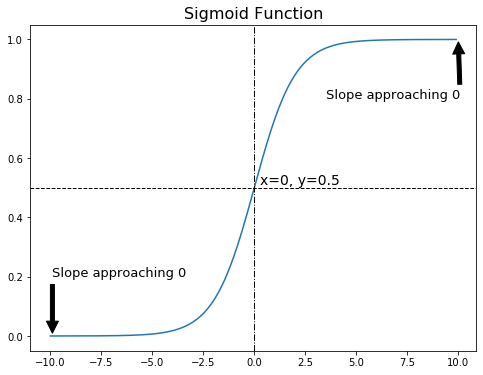

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = list(map(sigmoid, x))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)
ax.axhline(y=0.5, linewidth=1, color='black', linestyle='--')
ax.axvline(x=0, linewidth=1, color='black', linestyle='-.')
ax.annotate('x=0, y=0.5',fontsize=14, 
            xy=(0.3, 0.51), xycoords='data')
ax.annotate('Slope approaching 0', xy=(10, 1), xytext=(3.5, 0.8),
            fontsize=13, arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Slope approaching 0', xy=(-9.9, 0), xytext=(-9.9, 0.2),
            fontsize=13, arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Sigmoid Function', fontsize=16)
plt.show()

Reall that training a model means find the set of parameters which make the model best fit the training set according to the selected performance measure (loss function). The **loss function** for Logistic Regression is called **binary cross-entropy**:

$$L(y, \hat{y})=-[ylog(\hat{y})+(1-y)log(1-\hat{y})]$$

Note Loss function is usually a function defined on a single data point, prediction and label.

This measurement makes sense because:
- When $y=1$,  $L(y, \hat{y})=-log(\hat{y})$
> By minimizing  $L(y, \hat{y})$ we will make $\hat{y}$ large
- When $y=0$,  $L(y, \hat{y})=-log(1-\hat{y})$
> By minimizing  $L(y, \hat{y})$ we will make $\hat{y}$ small

This is consistent with our defination: $\hat{y} = P(y=1|x)$

For the whole training set, the **cost function** (the sum of loss functions over the whole training set):

$$J(W, b)= \frac{1}{m} \sum_{i=1}^m L(y, \hat{y})= -\frac{1}{m}\sum_{i=0}^m [ylog(\hat{y})+(1-y)log(1-\hat{y})]$$


Thus, for the logistic regression model, we want to find the best set of $W$ and $b$ such that the cost function is minimized. 

$$\underset{W,b}{\min}J(W, b)$$

There is no closed-form solution for this optimization problem. But luckily this cost function is convex. Thus, we can use **gradient descent** to solve the problem: it is guaranteed to find the global minimum.

**The idea of gradient descent is:** you start by initializing your parameters with some random values (this is called random initialization), then you improve it by taking baby steps (its size is determined by **learning rate $\alpha$**) towards the direction of the steepest slope of the cost function, until the algorithm converge (the slope does not change much any more).

Repeat:

$$W := W - \alpha\frac{\partial(J(W,b))}{\partial{W}}$$

$$b := b - \alpha\frac{\partial(J(W,b))}{\partial{b}}$$

Until the gradient vector becomes tiny or after certain number of iterations.

This process of updating parameters is called **back propogation**.
### Back Propogation
Here I will give a detailed explanation of back propogation of logistic regression model. For simplicity, I will only conider one single data points. Let's break down the model first:
Assume our input $x$ has two dimensions $(x_1, x_2)^T$, then $W=(w_1, w_2)$. The whole computation can be represented by the flow chart below:

$$z=W^{T}x+b$$
$$a = \hat{y} = \sigma(z) = \frac{1}{1+e^{-z}}$$
$$L(a, y) = -(yloga+(1-y)log(1-a))$$

<center><img src='https://drive.google.com/uc?id=13dnxxroJGZbMfgoQaK-b-esK_JNu9v6i' width=650> </img></center>


**Back Propogation:**

Just as the name indicates, back propogation goes from the cost function back to the parameters through the **chain rule**.

<center><img src='https://drive.google.com/uc?id=18UVBQYKupshnLTRl83Ls4Fscxih9zd13' width=650> </img></center>

**where** 

$$da = \frac{\partial(L(a,y))}{\partial{a}} = -\frac{y}{a} + \frac{y-1}{1-a} = \frac{-y(1-a)+a(1-y)}{a(1-a)} = \frac{a-y}{a(1-a)}$$

$$
\begin{align*} 
dz =\frac{\partial(L(a,y))}{\partial{z}} &= \frac{\partial(L(a,y))}{\partial{a}}\frac{\partial{a}}{\partial{z}} = da\frac{\partial{(\sigma(z))}}{\partial{z}} \\
&= \frac{a-y}{a(1-a)} \cdot \frac{1}{(1+e^{-z})^2}(-e^{-z}) \\
&= \frac{a-y}{a(1-a)} \cdot \frac{-e^{-z}}{(1+e^{-z})^2}\\
&= \frac{a-y}{a(1-a)} \cdot \sigma(z)(1-\sigma(z))\\
&= \frac{a-y}{a(1-a)} \cdot a(1-a)\\
&= a-y
\end{align*}
$$

$$dw_1 = \frac{\partial(L(a,y))}{\partial{w_1}} = \frac{\partial(L(a,y))}{\partial{z}}\frac{\partial{z}}{\partial{w_1}}=(a-y)x_1 = x_1dz$$

$$dw_2 = \frac{\partial(L(a,y))}{\partial{w_2}} = \frac{\partial(L(a,y))}{\partial{z}}\frac{\partial{z}}{\partial{w_2}}=(a-y)x_2 = x_2 dz$$

$$db = \frac{\partial(L(a,y))}{\partial{b}} = \frac{\partial(L(a,y))}{\partial{z}}\frac{\partial{z}}{\partial{b}} = a-y = dz$$

This is how back propogation update the parameters when you have only one data point:

$$w_1 = w_1 - \alpha \cdot dw_1$$
$$w_2 = w_2 - \alpha \cdot dw_2$$
$$b = b - \alpha \cdot db$$


Recall for the whole training set, the cost function $J(W, b)$ is the summation of loss functions over the whole training set. Thus,

$$da = \frac{\partial J(W,b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L(a^{i}, y^{i})}{\partial a} = \frac{1}{m}\sum_{i=0}^{m} da^{i}$$

$$dz = \frac{\partial J(W,b)}{\partial z} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L(a^{i}, y^{i})}{\partial z} = \frac{1}{m}\sum_{i=0}^{m}dz^i$$

$$dw_1 = \frac{\partial J(W,b)}{\partial w_1} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L(a^{i}, y^{i})}{\partial w_1} = \frac{1}{m}\sum_{i=0}^{m} x_1^{i} dz^i$$

$$dw_2 = \frac{\partial J(W,b)}{\partial w_2} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L(a^{i}, y^{i})}{\partial w_2} = \frac{1}{m}\sum_{i=0}^{m} x_2^{i} dz^i$$

$$db = \frac{\partial J(W,b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L(a^{i}, y^{i})}{\partial b} = \frac{1}{m}\sum_{i=0}^{m} dz^i$$

That's it. The Logistic regression mode. Actually you can consider logistic regression model as the simplest neural network: see the images below. We will talk more about this in another note later. 

<center><img src='https://drive.google.com/uc?id=1ynCwpFw7BWUABPzUaVQtak-9jJVrC7_Q' width=800> </img> </center>

### Implementation with Scikit-Learn
The famout **iris** dataset is used here.

In [36]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
print('Keys: \n', iris.keys())
print('Features Name: \n', iris.feature_names)
print('Target Name: \n', iris.target_names)

Keys: 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Features Name: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Name: 
 ['setosa' 'versicolor' 'virginica']


In [37]:
X = iris.data
y = iris.target
X.shape

(150, 4)

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Note there are actually 3 classes in this dataset, let's try to predict whether the iris type is 'virginica', 1 for yes, otherwise 0. Thus, this become a binary classification problem.

In [39]:
y = 1*(y==2)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [82]:
print('{}% of the data is negative'.format(round(100*(y==0).sum()/len(y))))

67.0% of the data is negative


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# The class_weight = balanced mode uses the values of y to automatically adjust weights 
# inversely proportional to class frequencies in the input data as
# n_samples / (n_classes * np.bincount(y))

clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)

# Get the predicted labels
y_pred = clf.predict(X_test)  

# Get the predicted probabilities
prob_pos = clf.predict_proba(X_test)[:, 1]  

In [85]:
display(y_pred)
display(prob_pos)

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0])

array([9.39102586e-01, 5.90919994e-02, 5.56957036e-06, 9.84875018e-01,
       1.30146635e-05, 9.92925912e-01, 8.73246341e-06, 3.53659574e-01,
       3.94583538e-01, 7.53905068e-02, 8.94929652e-01, 2.55935611e-01,
       3.12394460e-01, 3.41958840e-01, 3.89337607e-01, 7.78598123e-06,
       3.18371826e-01, 2.20559893e-01, 1.56771966e-05, 7.44671278e-06,
       8.18460946e-01, 3.45825006e-01, 4.21870146e-05, 1.60369702e-05,
       6.44443022e-01, 3.59715383e-06, 4.54840101e-05, 1.44795950e-01,
       1.33891327e-02, 2.51106467e-05, 9.07490400e-01, 3.65222808e-01,
       1.14258003e-05, 6.93987612e-01, 9.69574143e-01, 1.03328275e-01,
       1.68690085e-05, 7.61163190e-01, 1.70371399e-01, 7.72145183e-02,
       9.39124554e-01, 9.37884324e-06, 8.74488557e-01, 3.52382817e-05,
       9.58445749e-06])

### Model Evaluation

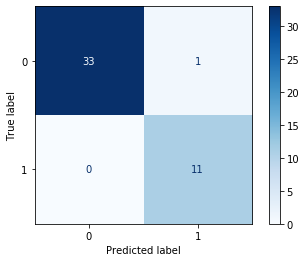

In [86]:
from sklearn.metrics import (plot_confusion_matrix, 
                             classification_report)

plot_confusion_matrix(clf, X_test, y_test,
                      cmap=plt.cm.Blues)
plt.show()

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.96      0.99      0.97        45
weighted avg       0.98      0.98      0.98        45



WoW, it seems like logistic regression can be a nearly perfect candidate for a simple task like this.

#### Useful Reference:

[Loss function & Loss function & Objective function](https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing)
